#### Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Show Data Diagram 

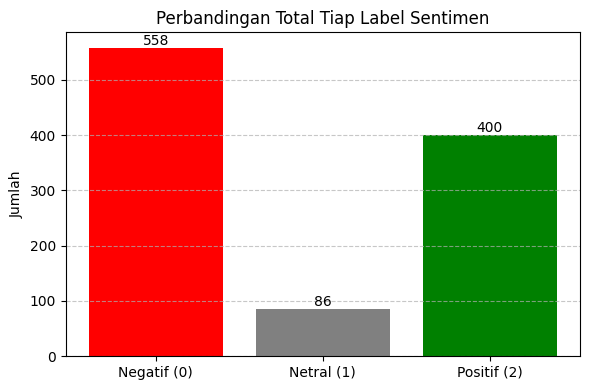

In [4]:
# Load the dataset from the Excel file
file_path_strava = 'scrapped_data_strava.xlsx' 
data1 = pd.read_excel(file_path_strava)

file_path_adidas = 'scrapped_data_adidas.xlsx' 
data2 = pd.read_excel(file_path_adidas)


file_path_nike = 'scrapped_data_nike.xlsx' 
data3 = pd.read_excel(file_path_nike)

# Merge the datasets
data = pd.concat([data1[['content', 'Label']], data2[['content', 'Label']], data3[['content', 'Label']]], ignore_index=True)

# Count the occurrences of each label
label_counts = data['Label'].value_counts().sort_index()

# Create a bar plot for the label counts
plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'gray', 'green'])
plt.xticks([0, 1, 2], ['Negatif (0)', 'Netral (1)', 'Positif (2)'])
plt.ylabel('Jumlah')
plt.title('Perbandingan Total Tiap Label Sentimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

#### Save Merge Data

In [5]:
data.to_excel("result.xlsx", index = False)  

#### Undersampling Negative Data

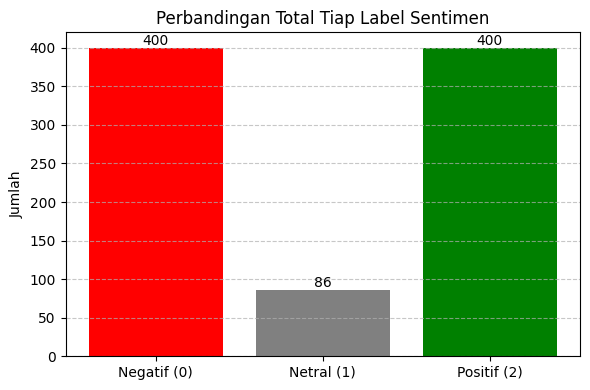

In [6]:
# Load the dataset from the Excel file
data = pd.read_excel("result.xlsx")

# Pisahkan data dengan label negatif
negatif_data = data[data['Label'] == 0]
negatif_sampled = negatif_data.sample(n=400, random_state=42)

netral_data = data[data['Label'] == 1]
positif_data = data[data['Label'] == 2]

data_balanced = pd.concat([negatif_sampled, netral_data, positif_data], ignore_index=True)

label_counts = data_balanced['Label'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'gray', 'green'])
plt.xticks([0, 1, 2], ['Negatif (0)', 'Netral (1)', 'Positif (2)'])
plt.ylabel('Jumlah')
plt.title('Perbandingan Total Tiap Label Sentimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Preprocessing

##### Cleaning Data

In [7]:
import re
import string

# Define a function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove not alphabet 
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove emoji (Unicode characters in a specific range)
    text = re.sub(r'[^\w\s,]', '', text, flags=re.UNICODE)
    return text

data['cleaning'] = data['content']

data['cleaning'] = data['cleaning'].apply(clean_text)
data.head(10)

,content,Label,cleaning
0,Aplikasi yang membantu untuk merekam aktivitas...,2.0,aplikasi yang membantu untuk merekam aktivitas...
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0.0,overall udah bagus bgt fiturnya bisa dibawa la...
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0.0,gak sengaja nutup app ini pas mau dibuka ulang...
3,"Aplikasinya sangat bagus, sangat recommended b...",2.0,aplikasinya sangat bagus sangat recommended ba...
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0.0,ride autopause tidak berfungsi sesuai yg dihar...
5,fitur menghapus aktifitas sebelum disave sanga...,0.0,fitur menghapus aktifitas sebelum disave sanga...
6,"Segera di Perbarui untuk peletakan tools, masa...",0.0,segera di perbarui untuk peletakan tools masak...
7,akun strava saya kok gak bisa login ya? pake a...,0.0,akun strava saya kok gak bisa login ya pake ak...
8,saya akhirnya menemukan hobi baru yaitu lari y...,2.0,saya akhirnya menemukan hobi baru yaitu lari y...
9,kenapa sekrang selalu bug ya? saya menggunakan...,0.0,kenapa sekrang selalu bug ya saya menggunakan ...


##### Stopwords Removal

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('indonesian'))

data['no_stopwords'] = data['cleaning']

data['no_stopwords'] = data['no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
data.head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,Label,cleaning,no_stopwords
0,Aplikasi yang membantu untuk merekam aktivitas...,2.0,aplikasi yang membantu untuk merekam aktivitas...,aplikasi membantu merekam aktivitas jalan kaki...
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0.0,overall udah bagus bgt fiturnya bisa dibawa la...,overall udah bagus bgt fiturnya dibawa latihan...
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0.0,gak sengaja nutup app ini pas mau dibuka ulang...,gak sengaja nutup app pas dibuka ulang continu...
3,"Aplikasinya sangat bagus, sangat recommended b...",2.0,aplikasinya sangat bagus sangat recommended ba...,aplikasinya bagus recommended banget pemulapem...
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0.0,ride autopause tidak berfungsi sesuai yg dihar...,ride autopause berfungsi sesuai yg diharapkan ...
5,fitur menghapus aktifitas sebelum disave sanga...,0.0,fitur menghapus aktifitas sebelum disave sanga...,fitur menghapus aktifitas disave berguna langs...
6,"Segera di Perbarui untuk peletakan tools, masa...",0.0,segera di perbarui untuk peletakan tools masak...,perbarui peletakan tools masak tombol card ged...
7,akun strava saya kok gak bisa login ya? pake a...,0.0,akun strava saya kok gak bisa login ya pake ak...,akun strava gak login ya pake akun apapun logi...
8,saya akhirnya menemukan hobi baru yaitu lari y...,2.0,saya akhirnya menemukan hobi baru yaitu lari y...,menemukan hobi lari lari suka menganggap lari ...
9,kenapa sekrang selalu bug ya? saya menggunakan...,0.0,kenapa sekrang selalu bug ya saya menggunakan ...,sekrang bug ya pace sekitaran aplikasi ditampi...


##### Words Tokenizing

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

data['tokenized'] = data['no_stopwords']

data['tokenized'] = data['tokenized'].apply(lambda x: word_tokenize(x))
data.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,Label,cleaning,no_stopwords,tokenized
0,Aplikasi yang membantu untuk merekam aktivitas...,2.0,aplikasi yang membantu untuk merekam aktivitas...,aplikasi membantu merekam aktivitas jalan kaki...,"[aplikasi, membantu, merekam, aktivitas, jalan..."
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0.0,overall udah bagus bgt fiturnya bisa dibawa la...,overall udah bagus bgt fiturnya dibawa latihan...,"[overall, udah, bagus, bgt, fiturnya, dibawa, ..."
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0.0,gak sengaja nutup app ini pas mau dibuka ulang...,gak sengaja nutup app pas dibuka ulang continu...,"[gak, sengaja, nutup, app, pas, dibuka, ulang,..."
3,"Aplikasinya sangat bagus, sangat recommended b...",2.0,aplikasinya sangat bagus sangat recommended ba...,aplikasinya bagus recommended banget pemulapem...,"[aplikasinya, bagus, recommended, banget, pemu..."
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0.0,ride autopause tidak berfungsi sesuai yg dihar...,ride autopause berfungsi sesuai yg diharapkan ...,"[ride, autopause, berfungsi, sesuai, yg, dihar..."
5,fitur menghapus aktifitas sebelum disave sanga...,0.0,fitur menghapus aktifitas sebelum disave sanga...,fitur menghapus aktifitas disave berguna langs...,"[fitur, menghapus, aktifitas, disave, berguna,..."
6,"Segera di Perbarui untuk peletakan tools, masa...",0.0,segera di perbarui untuk peletakan tools masak...,perbarui peletakan tools masak tombol card ged...,"[perbarui, peletakan, tools, masak, tombol, ca..."
7,akun strava saya kok gak bisa login ya? pake a...,0.0,akun strava saya kok gak bisa login ya pake ak...,akun strava gak login ya pake akun apapun logi...,"[akun, strava, gak, login, ya, pake, akun, apa..."
8,saya akhirnya menemukan hobi baru yaitu lari y...,2.0,saya akhirnya menemukan hobi baru yaitu lari y...,menemukan hobi lari lari suka menganggap lari ...,"[menemukan, hobi, lari, lari, suka, menganggap..."
9,kenapa sekrang selalu bug ya? saya menggunakan...,0.0,kenapa sekrang selalu bug ya saya menggunakan ...,sekrang bug ya pace sekitaran aplikasi ditampi...,"[sekrang, bug, ya, pace, sekitaran, aplikasi, ..."


##### Stemming

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['stemmed'] = data['no_stopwords']
data['stemmed'] = data['stemmed'].apply(lambda x: stemmer.stem(x))

data.head(10)

,content,Label,cleaning,no_stopwords,tokenized,stemmed
0,Aplikasi yang membantu untuk merekam aktivitas...,2.0,aplikasi yang membantu untuk merekam aktivitas...,aplikasi membantu merekam aktivitas jalan kaki...,"[aplikasi, membantu, merekam, aktivitas, jalan...",aplikasi bantu rekam aktivitas jalan kaki ku p...
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0.0,overall udah bagus bgt fiturnya bisa dibawa la...,overall udah bagus bgt fiturnya dibawa latihan...,"[overall, udah, bagus, bgt, fiturnya, dibawa, ...",overall udah bagus bgt fiturnya bawa latihanpr...
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0.0,gak sengaja nutup app ini pas mau dibuka ulang...,gak sengaja nutup app pas dibuka ulang continu...,"[gak, sengaja, nutup, app, pas, dibuka, ulang,...",gak sengaja nutup app pas buka ulang continue ...
3,"Aplikasinya sangat bagus, sangat recommended b...",2.0,aplikasinya sangat bagus sangat recommended ba...,aplikasinya bagus recommended banget pemulapem...,"[aplikasinya, bagus, recommended, banget, pemu...",aplikasi bagus recommended banget pemulapemula...
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0.0,ride autopause tidak berfungsi sesuai yg dihar...,ride autopause berfungsi sesuai yg diharapkan ...,"[ride, autopause, berfungsi, sesuai, yg, dihar...",ride autopause fungsi sesuai yg harap timer ny...
5,fitur menghapus aktifitas sebelum disave sanga...,0.0,fitur menghapus aktifitas sebelum disave sanga...,fitur menghapus aktifitas disave berguna langs...,"[fitur, menghapus, aktifitas, disave, berguna,...",fitur hapus aktifitas disave guna langsung sim...
6,"Segera di Perbarui untuk peletakan tools, masa...",0.0,segera di perbarui untuk peletakan tools masak...,perbarui peletakan tools masak tombol card ged...,"[perbarui, peletakan, tools, masak, tombol, ca...",baru leta tools masak tombol card gede banding...
7,akun strava saya kok gak bisa login ya? pake a...,0.0,akun strava saya kok gak bisa login ya pake ak...,akun strava gak login ya pake akun apapun logi...,"[akun, strava, gak, login, ya, pake, akun, apa...",akun strava gak login ya pake akun apa login f...
8,saya akhirnya menemukan hobi baru yaitu lari y...,2.0,saya akhirnya menemukan hobi baru yaitu lari y...,menemukan hobi lari lari suka menganggap lari ...,"[menemukan, hobi, lari, lari, suka, menganggap...",temu hobi lari lari suka anggap lari manfaat n...
9,kenapa sekrang selalu bug ya? saya menggunakan...,0.0,kenapa sekrang selalu bug ya saya menggunakan ...,sekrang bug ya pace sekitaran aplikasi ditampi...,"[sekrang, bug, ya, pace, sekitaran, aplikasi, ...",sekrang bug ya pace sekitar aplikasi tampil pa...


In [11]:
data.to_excel("data_cleaning.xlsx", index = False)  

#### Show WorldCloud

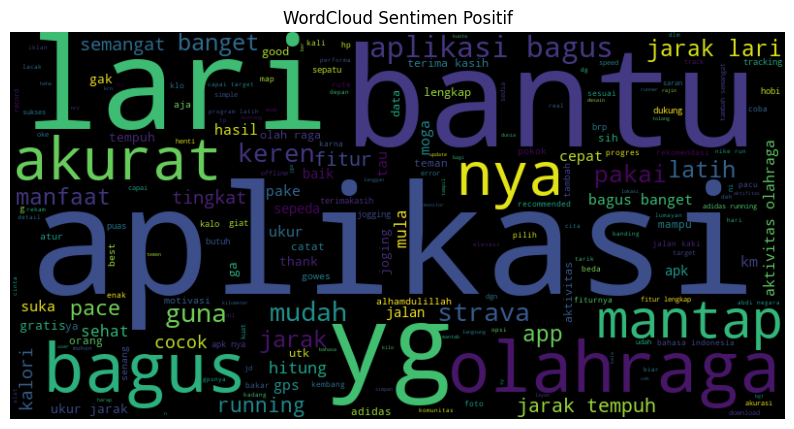

In [12]:
from wordcloud import WordCloud

text_positive = ' '.join(data[data['Label'] == 2]['stemmed'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_positive)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

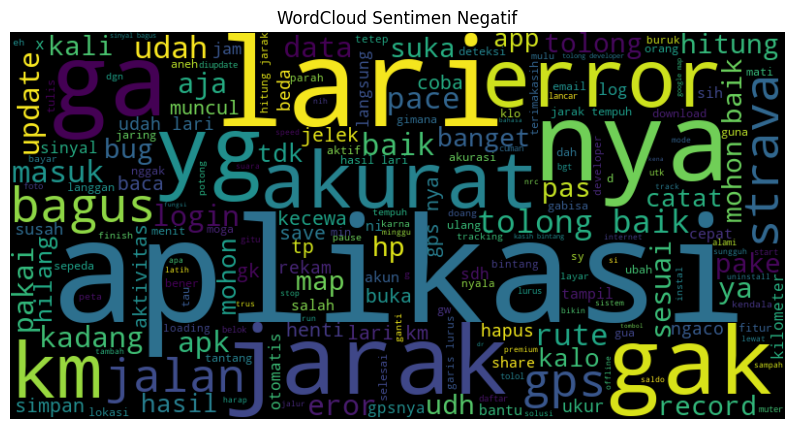

In [13]:
from wordcloud import WordCloud

text_negative = ' '.join(data[data['Label'] == 0]['stemmed'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_negative)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

#### Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

data = pd.read_excel('data_cleaning.xlsx')
X_train, X_test, y_train, y_test = train_test_split(data['stemmed'], data['Label'], test_size = 0.20, random_state = 0)

#### Pembobotan

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(837,)
(837,)
(210,)
(210,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [24]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

#### Model

In [25]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [26]:
y_pred = nb.predict(tfidf_test)

#### Menghitung Akurasi

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Melatih model Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

# Evaluasi model menggunakan average='macro'
print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average="macro"))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average="macro"))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average="macro"))

# Menampilkan confusion matrix dan classification report
print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.8761904761904762
MultinomialNB Precision: 0.6985902985902985
MultinomialNB Recall: 0.6411465302374394
MultinomialNB f1_score: 0.6411762650121907
confusion_matrix:
 [[116   1   4]
 [  7   1   6]
 [  7   1  67]]

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       121
           1       0.33      0.07      0.12        14
           2       0.87      0.89      0.88        75

    accuracy                           0.88       210
   macro avg       0.70      0.64      0.64       210
weighted avg       0.85      0.88      0.86       210



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14108\3288303613.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')


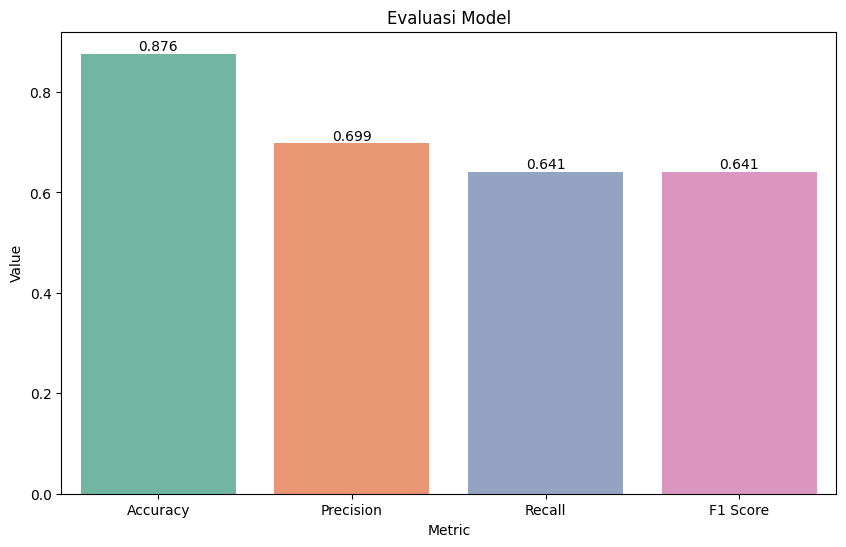

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="macro")  # Menggunakan 'macro' untuk multikelas
recall = recall_score(y_test, predicted, average="macro")
f1 = f1_score(y_test, predicted, average="macro")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'], 'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()